In [1]:
%matplotlib inline                                                             
import matplotlib as mpl                                                          #packages imported
import matplotlib.pyplot as plt
import random
import math

In [2]:
def spheref(x,y):                                                                 #sphere function for distance
    d = float(x**2+y**2)
    return d

In [3]:
def light(d):                                                                     #light intensity function
    l=1/d
    return l

In [4]:
def roulette_wheel(total):                                                        #roulette wheel function
    global c
    leader=-1
    r = random.uniform(0,1)
    for n in range(c):
        if r<total[n]:
            leader=n
            break
    return leader 

In [5]:
def probability_func(values,prob):                                                #calculating probability (max)
    global c
    for j in range(c):
        prob.append(values[j]/sum(values))
    return prob    

In [6]:
def slope(x1, y1, x2, y2):                                                        #slope function
    if(x1==x2):
        t=math.pi
    else:    
        m = (float)(y2-y1)/(x2-x1)
        t = math.atan(m)
    return(t)

In [7]:
def checkarea(rect,xc,yc):                                                        #checking position of point wrt obstacle
    flag=True
    for j in rect:
        if (xc>=j[0]) and (xc<=(j[0]+j[2])) and (yc>=j[1]) and (yc<=(j[1]+j[3])):
            flag=False
            print("Hey Obstacle!")            
            break
    return flag,j
        

In [8]:
def generate_obs(rectangle):                                                      #creating obstacles
    global l,b        
    rectangle.append([-l,-b,2*l,b])
    rectangle.append([-l,-b,l,2*b])

In [9]:
def new_path(newx,newy,rect):                                                     #candidate on obstacle edge
    d1=rect[1]+rect[3]-newy
    d2=rect[0]+rect[2]-newx
    d3=newy-rect[1]
    d4=newx-rect[0]
    m=min(d1,d2,d3,d4)
    if(m==d1):
        (px,py)=(newx,newy+d1)
    elif(m==d2):
        (px,py)=(newx+d2,newy)
    elif(m==d3):
        (px,py)=(newx,newy-d3)
    elif(m==d4):
        (px,py)=(newx-d4,newy)
    
    print("edge pt=",px,py)
    return px,py


In [10]:
def new_inputf(new_input,matrix,c_follow,rect):                                    #new matrix acc to following 
    m=t=0
    global c,step
    for i in range(c):
        xn=matrix[i][0]
        yn=matrix[i][1]
        xf=matrix[c_follow[i]][0]
        yf=matrix[c_follow[i]][1]
        
        if (c_follow[i]==i):
            t=random.uniform(-math.pi,math.pi)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            ai=xn-cos
            bi=yn-sin
            flag,j=checkarea(rect,ai,bi)
            if(flag):
                new_input[i].append(ai)
                new_input[i].append(bi)
            else:
                px,py=new_path(ai,bi,j)
                new_input[i].append(px)
                new_input[i].append(py)    
        else:
            t=slope(xn,yn,xf,yf)
            cos=abs(math.cos(t))*step
            sin=abs(math.sin(t))*step
            ci=xn+cos
            di=yn+sin
            ei=xn-cos
            fi=yn-sin
            if (xn<=xf and yn<=yf):
                flag,j=checkarea(rect,ci,di)
                if(flag):
                    new_input[i].append(ci)
                    new_input[i].append(di)
                else:
                    px,py=new_path(ci,di,j)
                    new_input[i].append(px)
                    new_input[i].append(py)    
                    
            elif (xn>=xf and yn>=yf):
                flag,j=checkarea(rect,ei,fi)
                if(flag):
                    new_input[i].append(ei)
                    new_input[i].append(fi)
                else:
                    px,py=new_path(ei,fi,j)
                    new_input[i].append(px)
                    new_input[i].append(py)

            elif (xn>=xf and yn<=yf):
                flag,j=checkarea(rect,ei,di)
                if(flag):
                    new_input[i].append(ei)
                    new_input[i].append(di)
                else: 
                    px,py=new_path(ei,di,j)
                    new_input[i].append(px)
                    new_input[i].append(py)
               
            elif (xn<=xf and yn>=yf):
                flag,j=checkarea(rect,ci,fi)
                if(flag):
                    new_input[i].append(ci)
                    new_input[i].append(fi)
                else: 
                    px,py=new_path(ci,fi,j)
                    new_input[i].append(px)
                    new_input[i].append(py)

    return new_input

In [11]:
def main_func(matrix,rect,n):  
    global frange,l,b,c,step,x,y              
   
    for i in range(c):                                                            #storing for plot
        x[i].append(matrix[i][0])
        y[i].append(matrix[i][1])
        
    distance_sq=[]                                                                #distance and light intensity
    distance=[]
    for i in range(c):
        distance_sq.append(float(spheref(matrix[i][0],matrix[i][1])))
        distance.append(float(math.sqrt(distance_sq[i])))
    print("Distance from light source: ", distance)
    
    light_int=[]
    for j in range(c):
        light_int.append(float(light(distance_sq[j])))
    #print("Light intensity: ",light_int)
    
    prob=[]
    probability_func(light_int,prob)
    #print("Probabilities: ",prob)
    
    total=[]                                                                      #creating the roulette scale
    for i in range(c):
        total.append(sum(prob[0:i+1]))
    #print("Roulette Wheel: ",total)
    
    c_follow=[]                                                                   #determining who follows whom
    for i in range(c):
        c_follow.append(int(roulette_wheel(total)))
    #print("Following: ",c_follow)
    
    new_input=[[] for _ in range(c)]                                              #new coordinates
    new_inputf(new_input,matrix,c_follow,rectangle)
    print("Next Learning attempt: ",new_input)
    
    print("Learning attempt no= ",n)
    n=n+1
    if n==100:
        step=0.5*step
    if all(val<0.1 for val in distance):
        return(x,y)
    else:
        main_func(new_input,rect,n)    

In [12]:
c=int(input("Enter number of candidates:"))                                      #taking input 
l=float(input("Enter length of arena:"))
b=float(input("Enter breadth of arena:"))
step=float(math.sqrt(l*b)/100)
#step=float(0.1)
print("Step=",step)

rectangle=[]
generate_obs(rectangle)                                                           #creating obstacles
print("Obstacle coordinates:",rectangle)

matrix=[[] for _ in range(c)]                                                     #matrix to store values of x,y
cnt=0
while cnt<c:
    xc=random.uniform(0,l)
    yc=random.uniform(0,b)
    flag,j=checkarea(rectangle,xc,yc)
    if (flag):
        matrix[cnt].append(xc)
        matrix[cnt].append(yc)
        cnt=cnt+1
    
print("Start positions: ",matrix)

Enter number of candidates:6
Enter length of arena:5
Enter breadth of arena:5
Step= 0.05
Obstacle coordinates: [[-5.0, -5.0, 10.0, 5.0], [-5.0, -5.0, 5.0, 10.0]]
Start positions:  [[3.061771853997921, 1.1881166931551816], [3.827357365765466, 0.894080204866437], [1.6831579966049393, 1.5816860862233733], [0.6384429596126778, 2.8722895800068473], [1.3385689663794746, 3.9456790499116763], [1.0208568267698415, 1.2247485194811043]]


In [13]:
x=[[] for _ in range(c)]
y=[[] for _ in range(c)]
main_func(matrix,rectangle,1)

Distance from light source:  [3.284214999431047, 3.930399956494654, 2.309708145391483, 2.9423896485841072, 4.166551336857152, 1.5944144996624143]
Next Learning attempt:  [[3.0117799059723533, 1.1890139849744565], [3.7777008459944668, 0.8999308496370888], [1.651699162462224, 1.6205492018264889], [0.6699017937553933, 2.8334264644037317], [1.3650658881976467, 3.903277244122752], [0.9789118377733068, 1.1975342236408553]]
Learning attempt no=  1
Distance from light source:  [3.2379889528044528, 3.8834133460083597, 2.31393384495298, 2.9115415062231422, 4.1350910659388544, 1.546724475439572]
Next Learning attempt:  [[2.9617803451289584, 1.189223545151167], [3.735246508385177, 0.9263435211823239], [1.6993577646880225, 1.6054277722021737], [0.6672714683785801, 2.7834956984531467], [1.3580016450358023, 3.85377879496977], [0.9467388092310374, 1.15926026076244]]
Learning attempt no=  2
Distance from light source:  [3.191613299435588, 3.8483995111786564, 2.337779960595844, 2.862359082264012, 4.0860

Distance from light source:  [1.3208977314860493, 1.3128139404100174, 1.315993101382314, 1.2688381625558365, 1.3114601142442741, 1.2984215372763466]
Next Learning attempt:  [[0.9321903171883892, 0.9004530086499225], [0.9156071425650711, 0.9117252098046815], [0.932175813338221, 0.911085513493205], [0.9175531677912624, 0.9077986676178855], [0.9334226722761677, 0.9253532003202944], [0.9102569216117528, 0.896353473871599]]
Learning attempt no=  152
Distance from light source:  [1.296068828514322, 1.2921220134761133, 1.3034678975218188, 1.2907370904458386, 1.314365409793712, 1.2775042909766636]
Next Learning attempt:  [[0.9321562146018215, 0.9254529853901835], [0.9405885303882999, 0.9107607086769277], [0.9343522783622377, 0.9359905932963141], [0.9398972850716538, 0.8965852638991161], [0.931246207252151, 0.9004481205171854], [0.8896715455640791, 0.8821674845519969]]
Learning attempt no=  153
Distance from light source:  [1.3135366141027056, 1.3092714966605365, 1.3225326350679936, 1.298950361

Learning attempt no=  318
Distance from light source:  [0.7085996225807608, 0.6866495948919114, 0.7096388165002767, 0.7007800156178683, 0.7209198277549255, 0.6884128622385958]
Next Learning attempt:  [[0.5596144170463166, 0.44022958331234163], [0.518116772759834, 0.41877294316003644], [0.5239013923042515, 0.44305040892258746], [0.5136498135182224, 0.4461976080797813], [0.5386325358889292, 0.4412809491257706], [0.5452916811441471, 0.4571904195871465]]
Learning attempt no=  319
Distance from light source:  [0.712018526296505, 0.6661949925794884, 0.6861241386985341, 0.6803884452159831, 0.6963145013422308, 0.711594053718327]
Next Learning attempt:  [[0.5346457435536366, 0.44148072040152636], [0.496397125728486, 0.40639324474554933], [0.5488237706473978, 0.4410818922929731], [0.48865118296936405, 0.4459359390489674], [0.5217914877434452, 0.4228045020278708], [0.5614213672089879, 0.43808981154840393]]
Learning attempt no=  320
Distance from light source:  [0.6933623133588035, 0.6415337682509

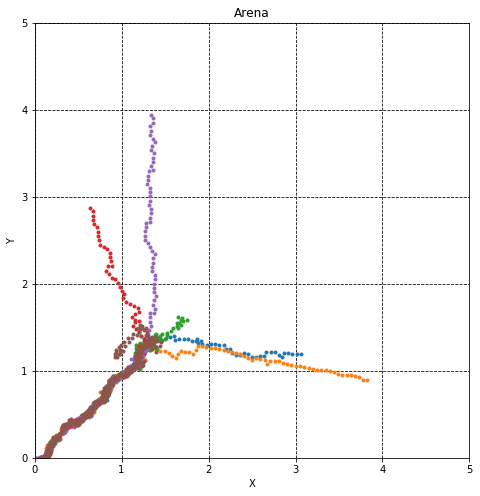

In [14]:
fig,ax=plt.subplots(figsize=(8, 8))
for p in range(c):
    ax.plot(x[p],y[p],".",linewidth=2,)
    
ax.set_title("Arena")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim((0,l))
ax.set_ylim((0,b))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', color='k', linestyle='--')

for q in rectangle:
    patch=plt.Rectangle((q[0],q[1]),q[2],q[3],color='lightpink')
    ax.add_patch(patch)

plt.show()

#### 